# Census Income Prediction
Project5

In [1]:
#Importing All Libraries required to build Model:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
#!pip install -U imbalanced-learn
#!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
#import imblearn
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv("census_income.csv")
#pd.set_option('display.max_columns',None)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

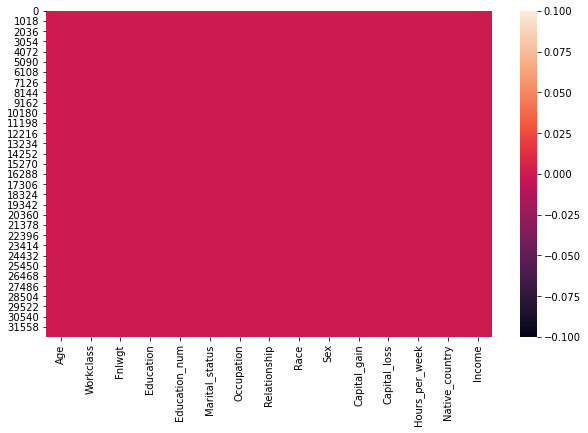

In [7]:
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())

### Data Handling: to check for special characters in columns

In [8]:
import string
alphabet = string.punctuation
alphabet

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
df.Workclass.str.strip(alphabet).astype(bool).any()

True

In [10]:
df["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [11]:
df["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [12]:
df["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [13]:
df_nan=df.copy()

In [14]:
df_nan.replace(' ?', np.NaN, inplace=True)

In [15]:
df_nan.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [16]:
df_nan.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [17]:
null_columns =['Workclass','Occupation','Native_country']
for i in null_columns:
    df_nan.fillna(df[i].mode()[0], inplace=True)

In [18]:
df_nan.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [19]:
df_nan.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
df_nan['Income'].value_counts(normalize=True)

 <=50K    0.759183
 >50K     0.240817
Name: Income, dtype: float64

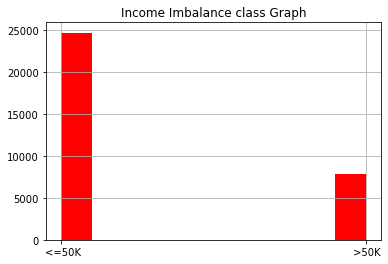

In [21]:
df_nan["Income"].hist(grid=True,color='red')
plt.title("Income Imbalance class Graph")
plt.show()

# Label Encoding:

In [22]:
df_encoded=df_nan.copy()

In [23]:
obj_df = df_encoded.select_dtypes(include=['object']).copy()
obj_df.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [24]:
LE=LabelEncoder()
for column in obj_df:
    df_encoded.loc[:,column] = LE.fit_transform(df_encoded.loc[:,column])
df_encoded.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,39,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,39,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,39,0
3,28,3,338409,9,13,2,10,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,39,0


In [25]:
df_dropped_column=df_encoded.drop("Education",axis=1)

In [26]:
df_dropped_column.shape ,df_encoded.shape

((32560, 14), (32560, 15))

# EDA

### Univariate Analysis:

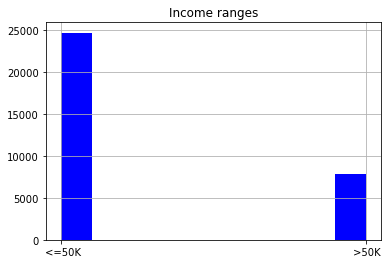

In [27]:
df["Income"].hist(grid=True,color='blue')
plt.title("Income ranges")
plt.show()

Observation:
We can observe that the counts of people with salary less than 50k is higher.

<AxesSubplot:xlabel='Age', ylabel='count'>

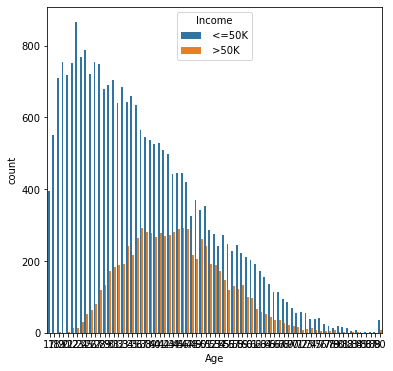

In [28]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Age',data=df,hue='Income')

<AxesSubplot:xlabel='Workclass', ylabel='count'>

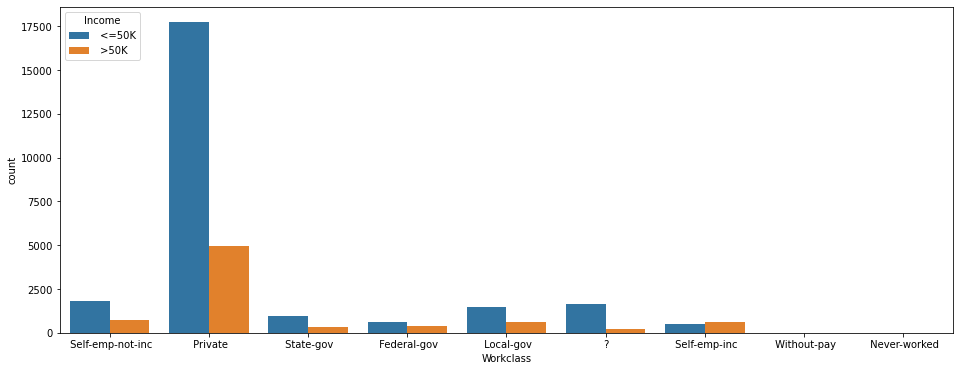

In [29]:
plt.subplots(figsize=(16,6))
sns.countplot(x='Workclass',data=df,hue='Income')

<AxesSubplot:xlabel='Education', ylabel='count'>

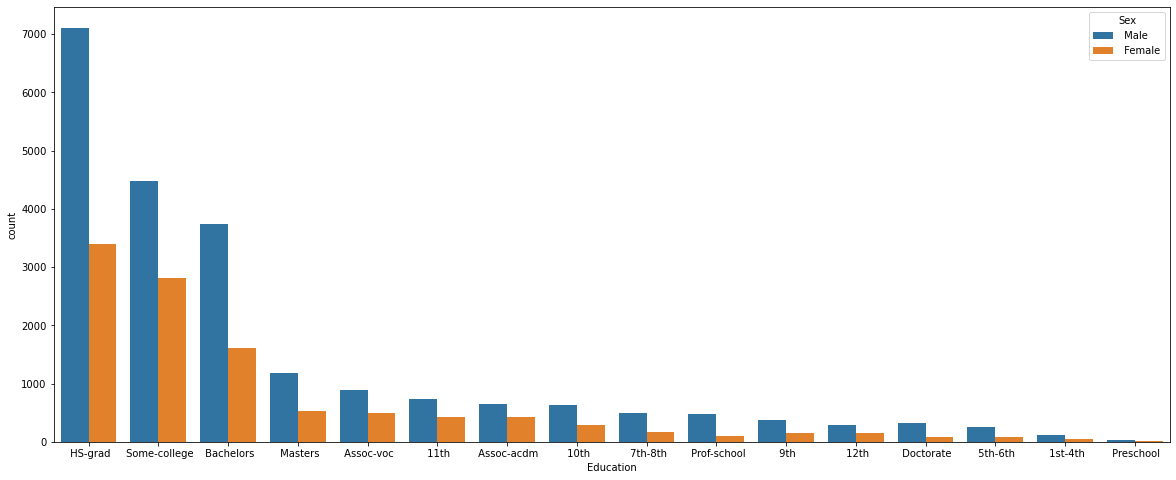

In [30]:
plt.subplots(figsize=(20,8))
sns.countplot(x='Education',data=df,hue='Sex',order = df['Education'].value_counts().index)

<AxesSubplot:xlabel='Education', ylabel='count'>

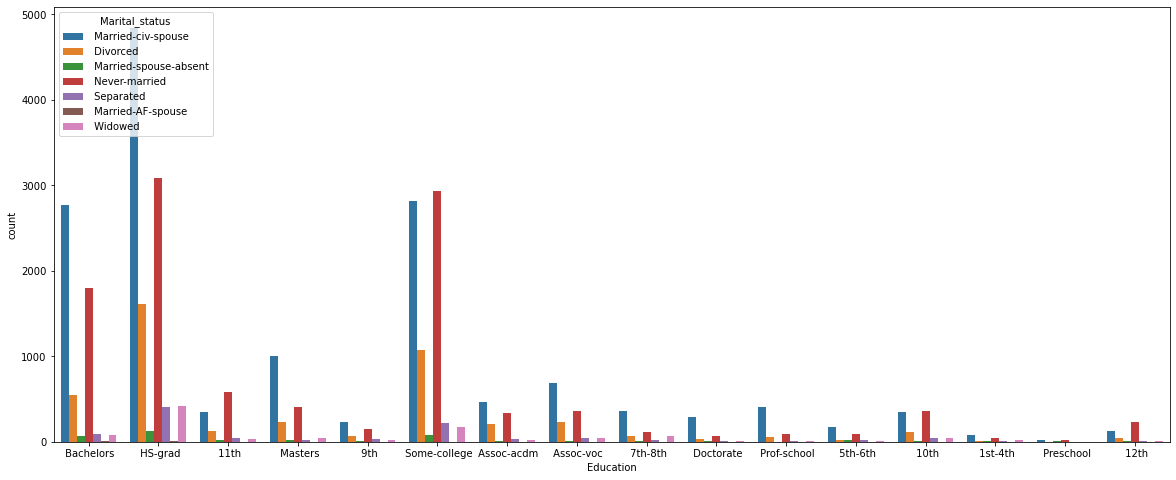

In [31]:
plt.subplots(figsize=(20,8))
sns.countplot(x='Education',data=df,hue='Marital_status')

<AxesSubplot:xlabel='Education', ylabel='count'>

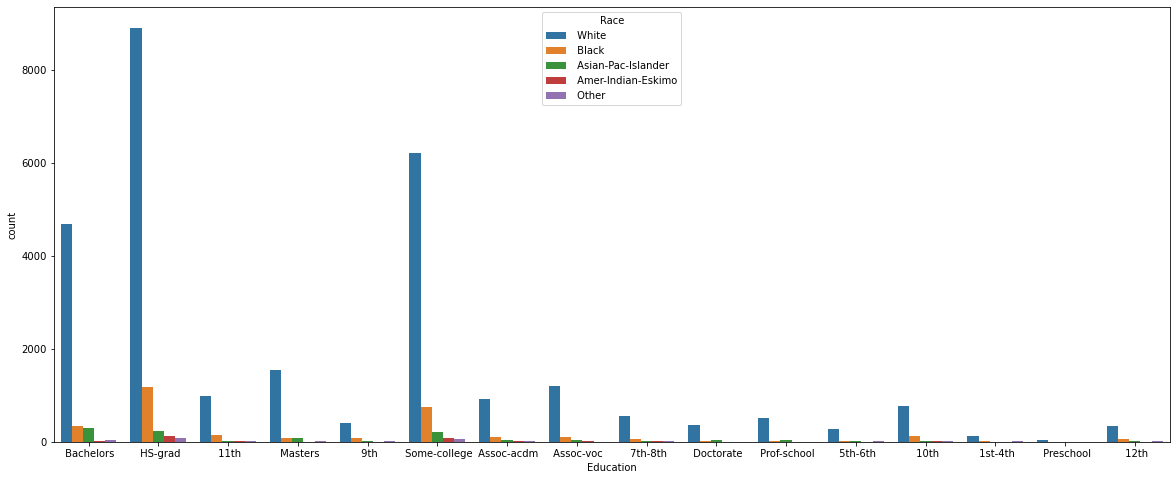

In [32]:
plt.subplots(figsize=(20,8))
sns.countplot(x='Education',data=df,hue='Race')

<AxesSubplot:xlabel='Race', ylabel='count'>

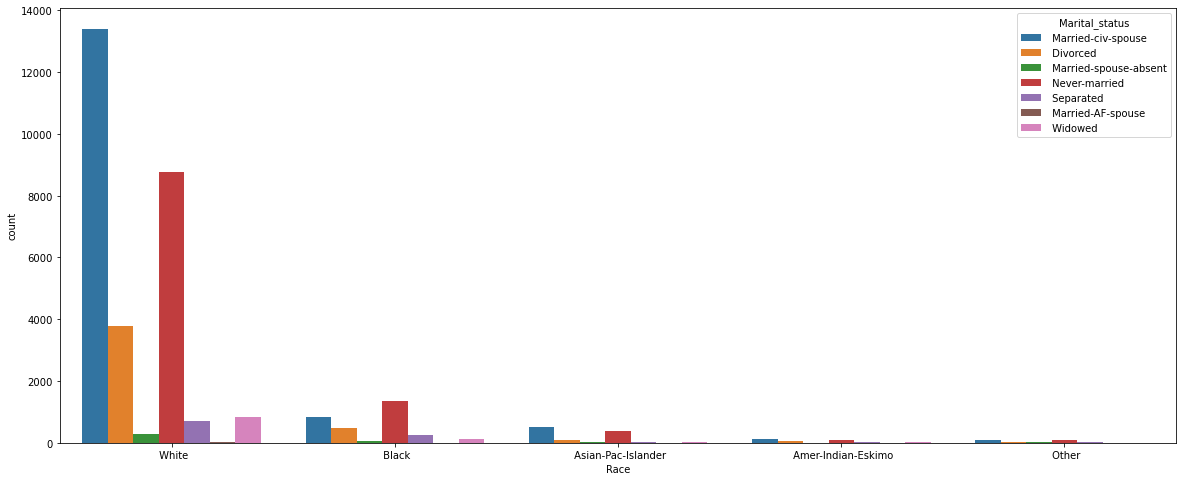

In [33]:
plt.subplots(figsize=(20,8))
sns.countplot(x='Race',data=df,hue='Marital_status')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

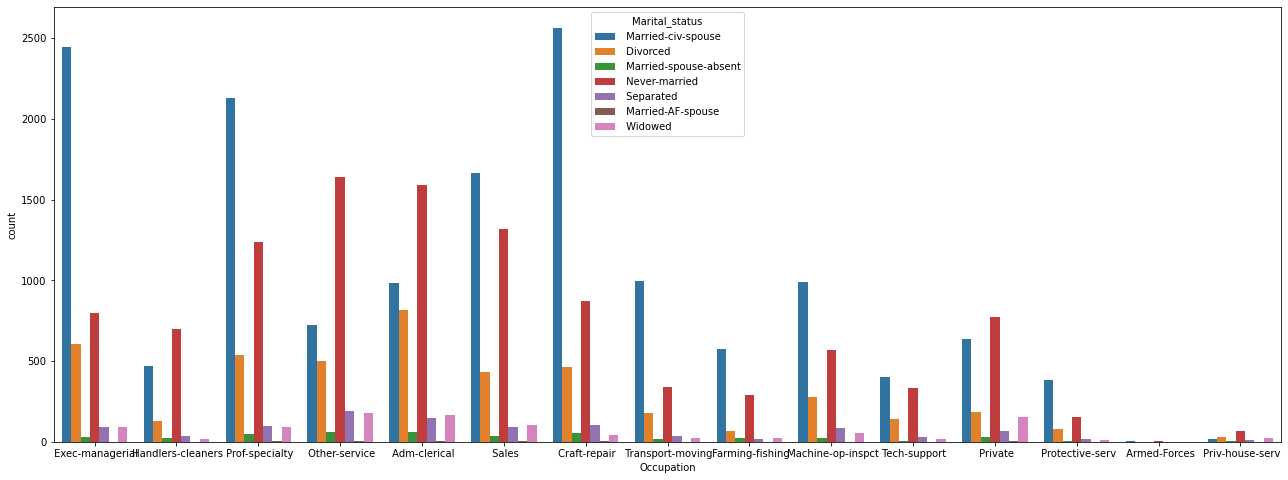

In [34]:
plt.subplots(figsize=(22,8))
sns.countplot(x='Occupation',data=df_nan,hue='Marital_status')

<AxesSubplot:xlabel='Sex', ylabel='count'>

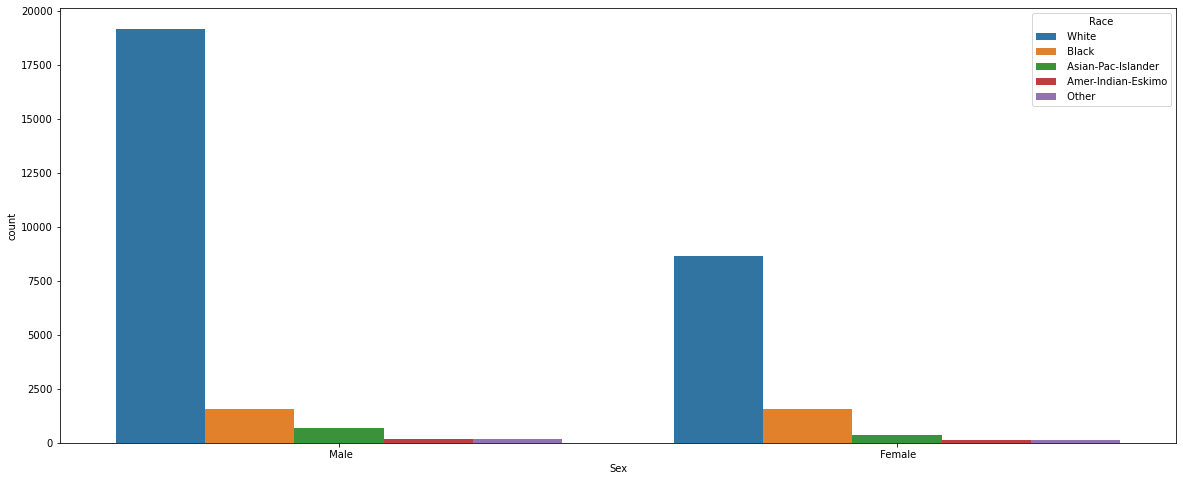

In [35]:
plt.subplots(figsize=(20,8))
sns.countplot(x='Sex',data=df,hue='Race')

<AxesSubplot:xlabel='Sex', ylabel='count'>

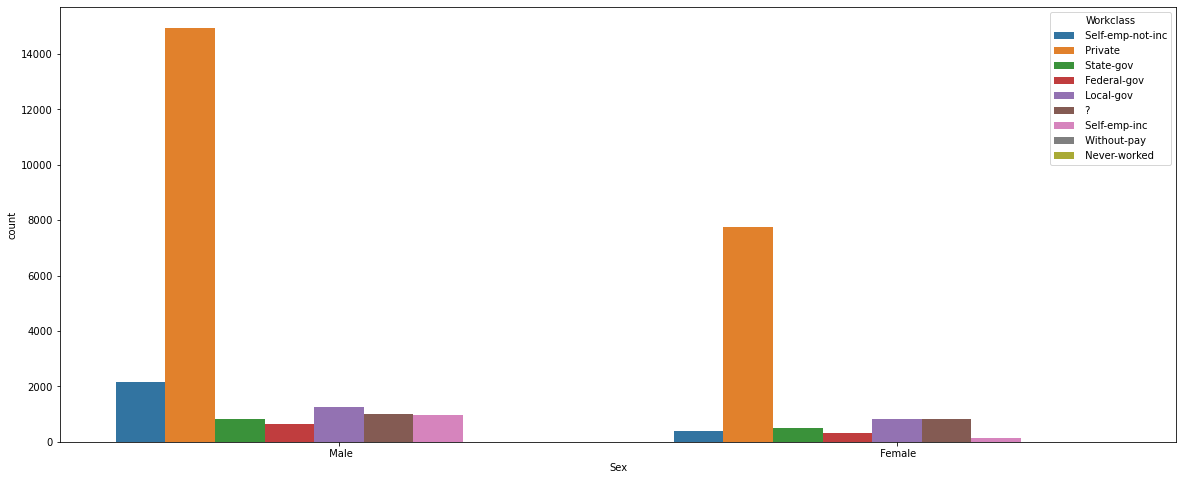

In [36]:
plt.subplots(figsize=(20,8))
sns.countplot(x='Sex',data=df,hue='Workclass')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

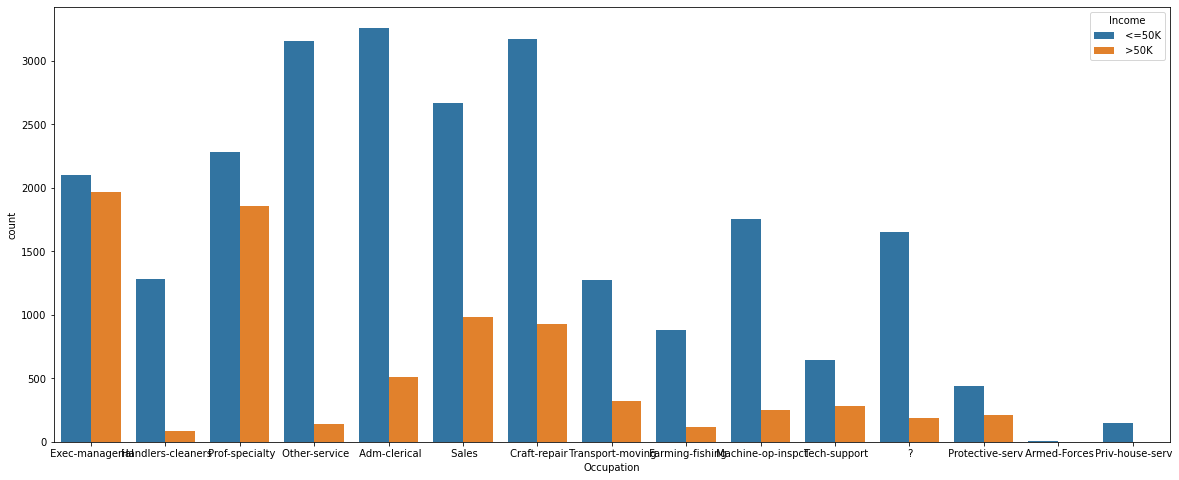

In [37]:
plt.subplots(figsize=(20,8))
sns.countplot(x='Occupation',data=df,hue='Income')

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

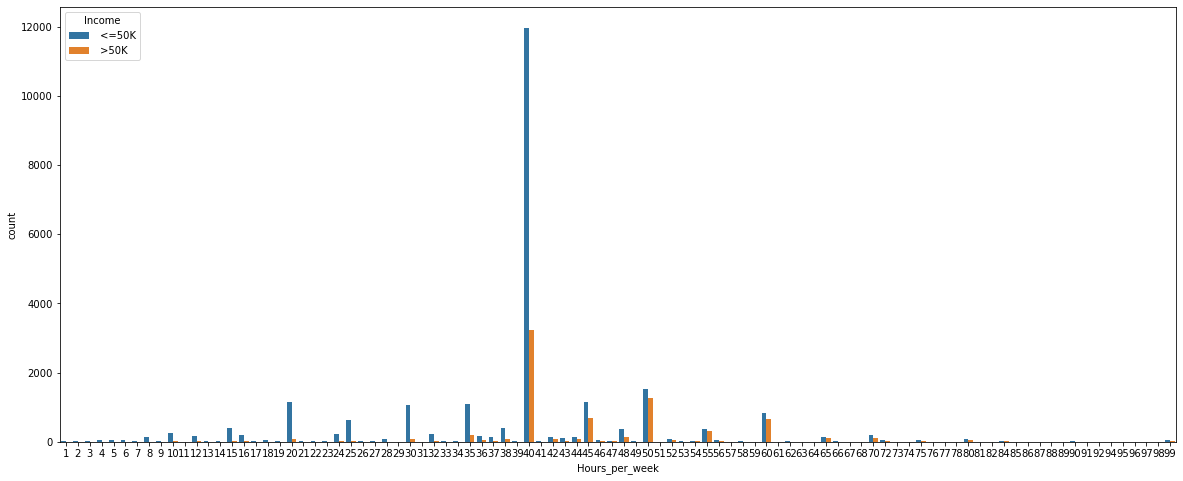

In [38]:
plt.subplots(figsize=(20,8))
sns.countplot(x='Hours_per_week',data=df,hue='Income')

Observation:
We can observe that the 40 hrs work per week catogory has more counts and in that itself income below 50k is higher that income >50k.

<AxesSubplot:xlabel='Income', ylabel='count'>

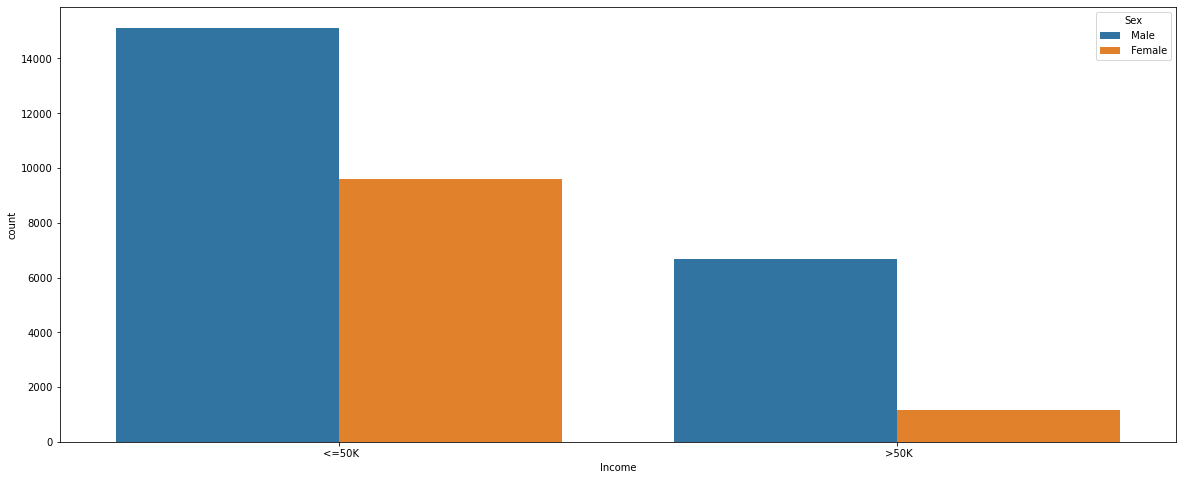

In [39]:
plt.subplots(figsize=(20,8))
sns.countplot(x='Income',data=df,hue='Sex')

# Bivariate Analysis:

<AxesSubplot:title={'center':'Work class with Ages'}, xlabel='Age', ylabel='Workclass'>

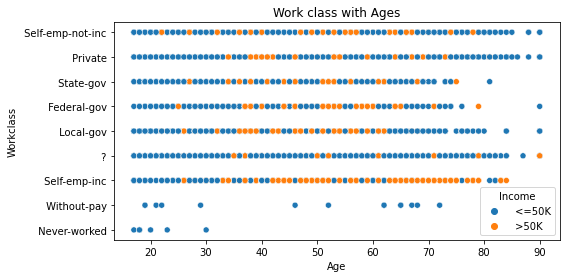

In [40]:
plt.figure(figsize=[8,4])
plt.title('Work class with Ages')
sns.scatterplot(df['Age'],df['Workclass'],hue=df['Income'])

<AxesSubplot:title={'center':'Age and Education'}, xlabel='Age', ylabel='Education'>

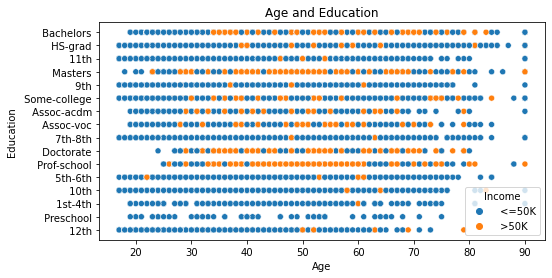

In [41]:
plt.figure(figsize=[8,4])
plt.title('Age and Education')
sns.scatterplot(df['Age'],df['Education'],hue=df['Income'])

<AxesSubplot:title={'center':'Eduction and occupation'}, xlabel='Education', ylabel='Occupation'>

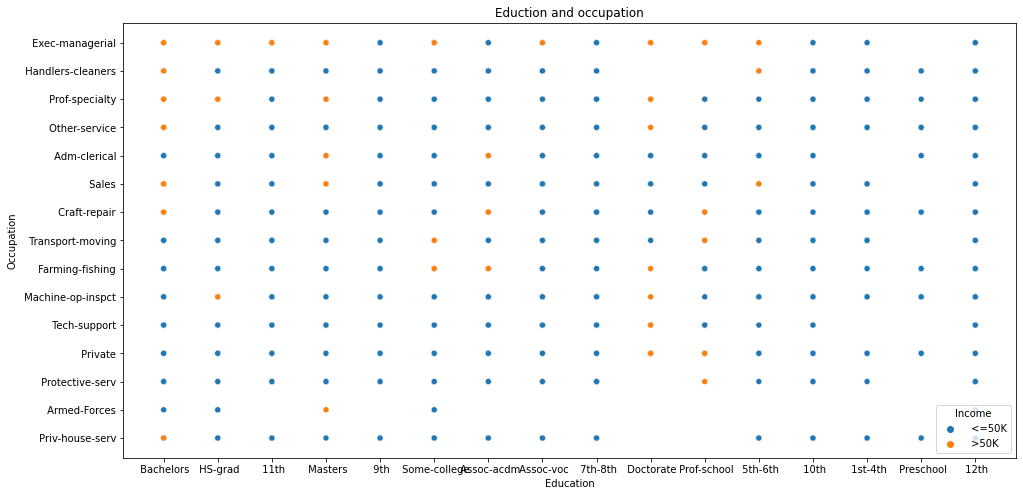

In [42]:
plt.figure(figsize=[16,8])
plt.title('Eduction and occupation')
sns.scatterplot(df_nan['Education'],df_nan['Occupation'],hue=df['Income'])

<AxesSubplot:title={'center':'Race with Sex'}, xlabel='Sex', ylabel='Race'>

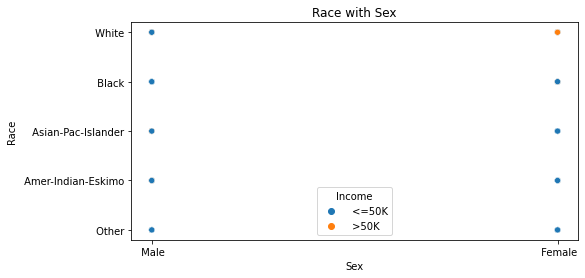

In [43]:
plt.figure(figsize=[8,4])
plt.title('Race with Sex')
sns.scatterplot(df['Sex'],df['Race'],hue=df['Income'])

<AxesSubplot:title={'center':'Occupation Vs Native Country'}, xlabel='Occupation', ylabel='Native_country'>

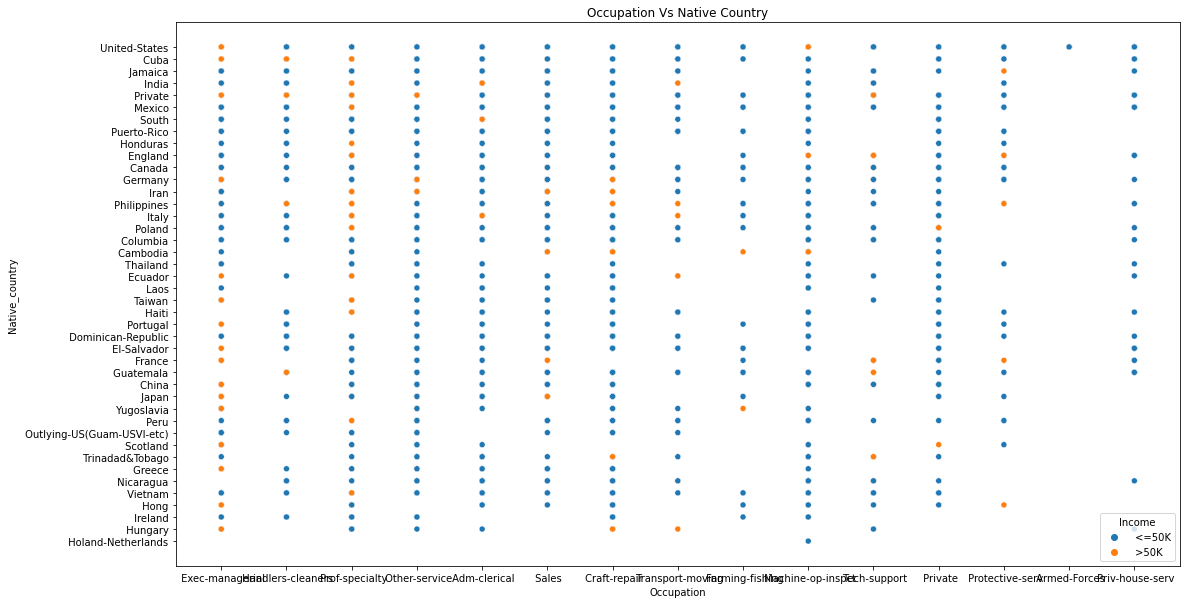

In [44]:
plt.figure(figsize=[18,10])
plt.title('Occupation Vs Native Country')
sns.scatterplot(df_nan['Occupation'],df_nan['Native_country'],hue=df['Income'])

<AxesSubplot:title={'center':'Workclass with Sex'}, xlabel='Workclass', ylabel='Sex'>

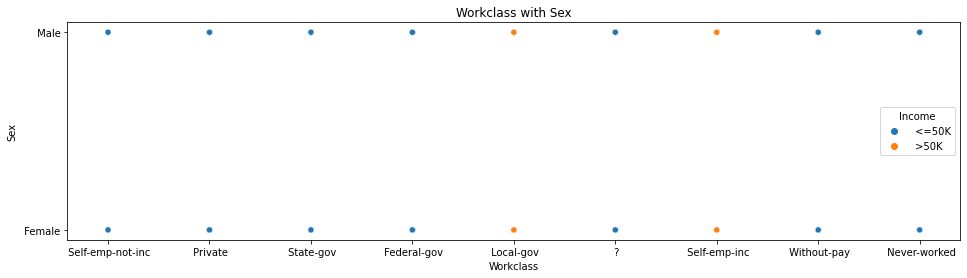

In [45]:
plt.figure(figsize=[16,4])
plt.title('Workclass with Sex')
sns.scatterplot(df['Workclass'],df['Sex'],hue=df['Income'])

<AxesSubplot:title={'center':'Hours per week Vs Gender'}, xlabel='Hours_per_week', ylabel='Sex'>

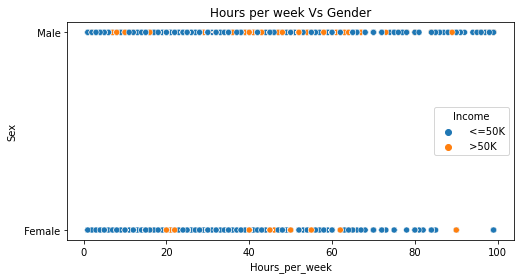

In [46]:
plt.figure(figsize=[8,4])
plt.title('Hours per week Vs Gender')
sns.scatterplot(df['Hours_per_week'],df['Sex'],hue=df['Income'])

<AxesSubplot:title={'center':'Hours per week Vs Workclass'}, xlabel='Hours_per_week', ylabel='Workclass'>

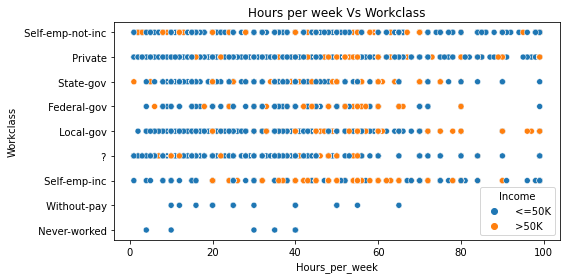

In [47]:
plt.figure(figsize=[8,4])
plt.title('Hours per week Vs Workclass')
sns.scatterplot(df['Hours_per_week'],df['Workclass'],hue=df['Income'])

<AxesSubplot:title={'center':'Age with Work Hours per week'}, xlabel='Hours_per_week', ylabel='Age'>

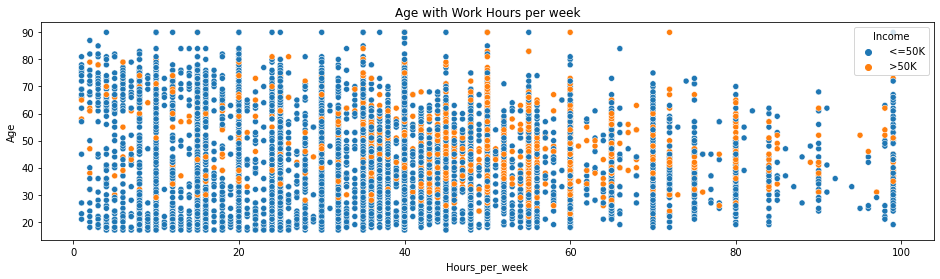

In [48]:
plt.figure(figsize=[16,4])
plt.title('Age with Work Hours per week')
sns.scatterplot(df['Hours_per_week'],df['Age'],hue=df['Income'])

# MultiVariate Analysis:

In [49]:
corr_mat=df_dropped_column.corr()
corr_mat

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,0.036527,-0.266292,0.004124,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,0.000223,0.234039
Workclass,0.040506,1.000000,-0.024255,0.003445,-0.020545,0.006143,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.002214,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.043159,0.028184,-0.000108,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.064851,-0.009481
Education_num,0.036527,0.003445,-0.043159,1.000000,-0.069338,0.095735,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.086488,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.069338,1.000000,0.028312,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023215,-0.199295
Occupation,0.004124,0.006143,-0.000108,0.095735,0.028312,1.000000,-0.042996,-0.001185,0.048325,0.022316,0.012975,-0.002206,-0.000270,0.048291
Relationship,-0.263698,-0.057931,0.008922,-0.094145,0.185461,-0.042996,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010026,-0.250924
Race,0.028718,0.048323,-0.021278,0.031825,-0.068025,-0.001185,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.128053,0.071853
Sex,0.088832,0.071535,0.026882,0.012256,-0.129337,0.048325,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.000480,0.215995
Capital_gain,0.077674,0.031496,0.000437,0.122627,-0.043398,0.022316,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,0.006948,0.223333


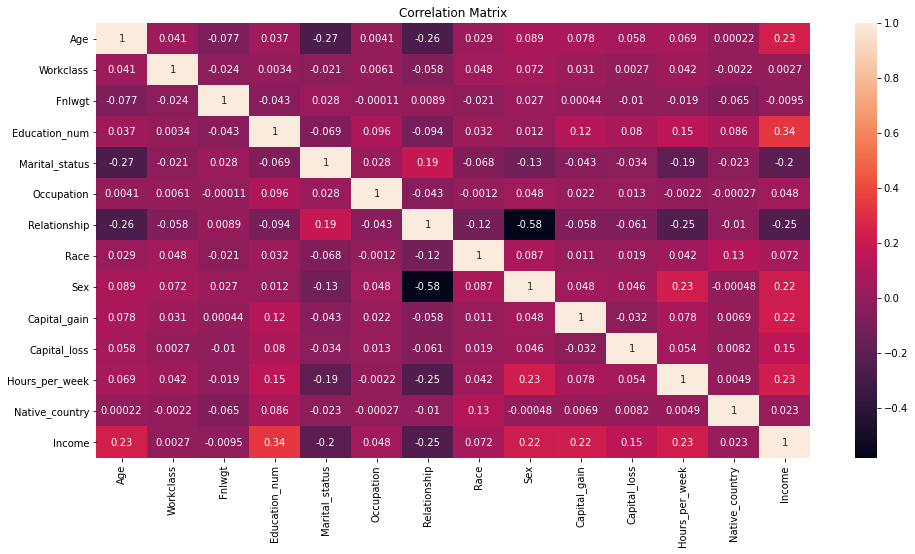

In [50]:
plt.figure(figsize=[16,8])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Lets Check Outliers with Box Plot:

Age                  AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Workclass         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Fnlwgt            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Education_num     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Marital_status    AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Occupation        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Relationship      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Race                    AxesSubplot(0.125,0.125;0.0945122x0.343182)
Sex                  AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Capital_gain         AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Capital_loss         AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Hours_per_week       AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Native_country       AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Income               AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

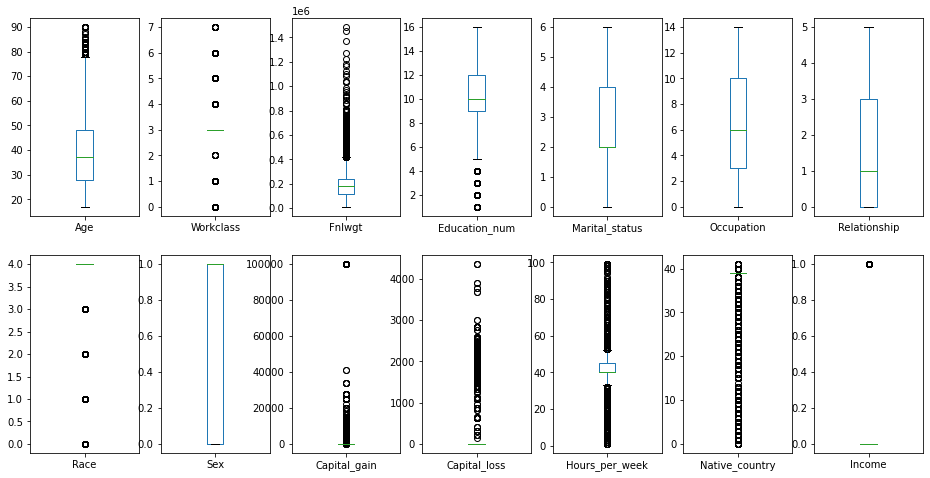

In [51]:
df_dropped_column.plot(kind='box',subplots=True,layout=(2,7),figsize=[16,8])

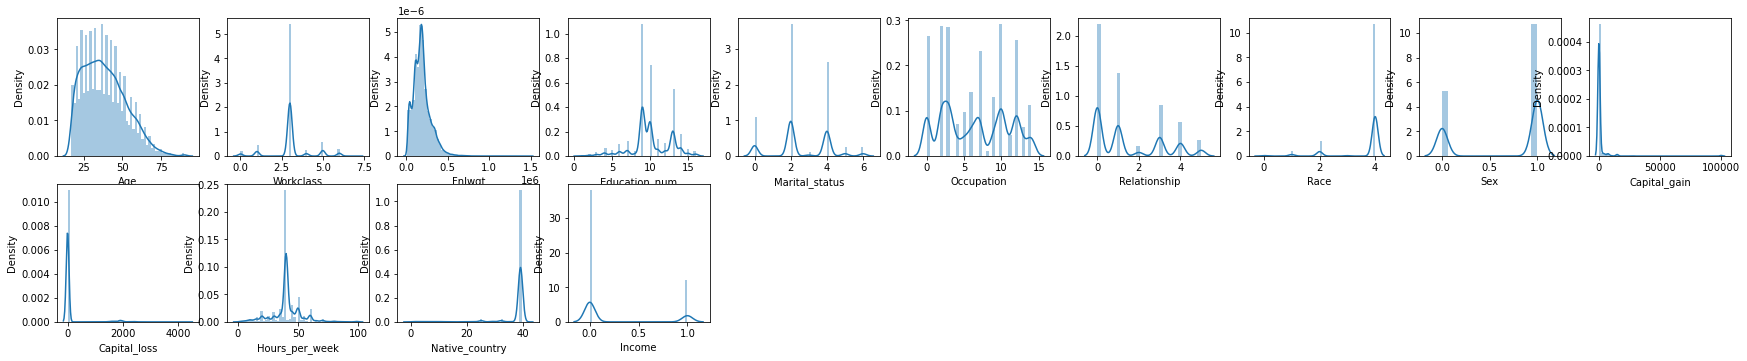

In [52]:
collist=df_dropped_column.columns.values
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df_dropped_column[collist[i]])

In [53]:
df_dropped_column.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.090052
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.058159
Income             1.212383
dtype: float64

# Outliers Removal:

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(df_dropped_column))
df_zscore=df_dropped_column[(z<3).all(axis=1)]

In [55]:
df_zscore.shape

(27770, 14)

In [56]:
df_dropped_column.shape

(32560, 14)

In [57]:
((32560-27770)/32560)*100

14.71130221130221

In [58]:
q1=df_dropped_column.quantile(0.25)
q3=df_dropped_column.quantile(0.75)
IQR=q3-q1
print(IQR)

Age                   20.0
Workclass              0.0
Fnlwgt            119223.0
Education_num          3.0
Marital_status         2.0
Occupation             7.0
Relationship           3.0
Race                   0.0
Sex                    1.0
Capital_gain           0.0
Capital_loss           0.0
Hours_per_week         5.0
Native_country         0.0
Income                 0.0
dtype: float64


In [59]:
df_new1=df_dropped_column[~((df_dropped_column<(q1-1.5*IQR)) | (df_dropped_column>(q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)
print(df_dropped_column.shape)

(9096, 14)
(32560, 14)


# Balancing of Imbalanced data and Standardisation:

In [60]:
df_dropped_column.Income.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [61]:
df_dropped_column.Income.value_counts(normalize=True)

0    0.759183
1    0.240817
Name: Income, dtype: float64

In [62]:
count_class0,count_class1=df_dropped_column.Income.value_counts()

In [63]:
count_class0 ,count_class1

(24719, 7841)

In [64]:
df_class0=df_dropped_column[df_dropped_column['Income']==0]
df_class1=df_dropped_column[df_dropped_column['Income']==1]

In [65]:
df_class0.shape

(24719, 14)

In [66]:
df_class1.shape

(7841, 14)

In [67]:
df_class_oversample=df_class1.sample(count_class0,replace=True)
df_class_oversample.shape

(24719, 14)

In [68]:
df_final_oversample=pd.concat([df_class0,df_class_oversample],axis=0)
df_final_oversample.shape

(49438, 14)

In [69]:
24719+24719

49438

In [70]:
print("Ramdom Over sampling:")
print(df_final_oversample.Income.value_counts())

Ramdom Over sampling:
1    24719
0    24719
Name: Income, dtype: int64


In [71]:
x=df_final_oversample.drop("Income",axis=1)
y=df_final_oversample["Income"]

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=12,stratify=y)

# Skewness Removal:

In [73]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [74]:
x=df_skew

In [75]:
x.skew()

Age              -0.025043
Workclass         0.168709
Fnlwgt            0.020163
Education_num    -0.005961
Marital_status   -0.001323
Occupation       -0.212823
Relationship      0.348668
Race             -2.216089
Sex              -1.036655
Capital_gain      2.264437
Capital_loss      3.569128
Hours_per_week    0.249863
Native_country   -2.743817
dtype: float64

# Checking for Best Random State:

In [76]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=i,stratify=y)
    lr=DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)

Best accuracy is   0.9233244460788821   at random_state: 79


# Model Buildings:

### Lets do modeling with 3 to 4 models so as to get the best fit model for good accuracy and prediction.

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=maxRS,stratify=y)

In [78]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(f1_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9232325089638687
0.9271315123483724
[[4730  708]
 [ 127 5312]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5438
           1       0.88      0.98      0.93      5439

    accuracy                           0.92     10877
   macro avg       0.93      0.92      0.92     10877
weighted avg       0.93      0.92      0.92     10877



In [79]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(f1_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9398731267812817
0.9424295774647887
[[4870  568]
 [  86 5353]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5438
           1       0.90      0.98      0.94      5439

    accuracy                           0.94     10877
   macro avg       0.94      0.94      0.94     10877
weighted avg       0.94      0.94      0.94     10877



In [87]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7683184701664062
[[4118 1320]
 [1200 4239]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      5438
           1       0.76      0.78      0.77      5439

    accuracy                           0.77     10877
   macro avg       0.77      0.77      0.77     10877
weighted avg       0.77      0.77      0.77     10877



In [88]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.8291808403052312
[[4417 1021]
 [ 837 4602]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      5438
           1       0.82      0.85      0.83      5439

    accuracy                           0.83     10877
   macro avg       0.83      0.83      0.83     10877
weighted avg       0.83      0.83      0.83     10877



In [85]:
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8276179093500046
[[4136 1303]
 [ 572 4866]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      5439
           1       0.79      0.89      0.84      5438

    accuracy                           0.83     10877
   macro avg       0.83      0.83      0.83     10877
weighted avg       0.83      0.83      0.83     10877



In [82]:
scr=cross_val_score(dt,x,y,cv=5,scoring='f1')
print("Cross Validation Score of DecisionTree Model is : ", scr.mean())

Cross Validation Score of DecisionTree Model is :  0.9227592637267863


In [108]:
scr=cross_val_score(rf,x,y,cv=5,scoring='f1')
print("Cross Validation Score of RandomForest Model is : ", scr.mean())

Cross Validation Score of RandomForest Model is :  0.9382675488082282


In [88]:
scr=cross_val_score(svc,x,y,cv=5,scoring='f1')
print("Cross Validation Score of Support Vector Model is : ", scr.mean())

Cross Validation Score of Support Vector Model is :  0.8324842584784973


In [86]:
scr=cross_val_score(gnb,x,y,cv=5,scoring='f1')
print("Cross Validation Score of GussianNB Model is : ", scr.mean())

Cross Validation Score of GussianNB Model is :  0.7711288293886815


In [85]:
scr=cross_val_score(ab,x,y,cv=5,scoring='f1')
print("Cross Validation Score of AdaBoost Model is : ", scr.mean())

Cross Validation Score of AdaBoost Model is :  0.8297021194300491


# 1st Parameter Tuning:

#### SVC Model:

In [91]:
parameters = {'C': [1, 10, 100],'gamma': [.01, .1],'kernel':['poly','rbf','sigmoid']}

In [92]:
gcv=GridSearchCV(SVC(), parameters,cv=5) #Tuning svc

In [ ]:
gcv.fit(x_train,y_train)

In [116]:
gcv.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [117]:
mod=SVC(C=100,gamma=0.1,kernel='rbf',random_state=maxRS)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(f1_score(y_test,pred)*100)

86.35632183908045


# 2nd Parameter Tuning:

#### Random Forest Classifier:

In [89]:
#parameters={'max_depth': np.arange(2,10),'criterion': ['gini','entropy']}
parameters ={
              "bootstrap": [True,False],
              "criterion" : ["gini", "entropy"],              
             }

In [90]:
gcv=GridSearchCV(RandomForestClassifier(), parameters,cv=5) #Tuning RandomForestClassifier

In [91]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy']})

In [92]:
gcv.best_params_

{'bootstrap': False, 'criterion': 'entropy'}

In [93]:
mod2=RandomForestClassifier(bootstrap='False',criterion='entropy',random_state=maxRS)
mod2.fit(x_train,y_train)
pred=mod2.predict(x_test)
print(f1_score(y_test,pred)*100)

94.1879890969841


# 3rd Parameter Tuning:

### Decision Tree Classifier:

In [94]:
#from scipy.stats import randint
#param_dist = {"max_depth": [3, None],"max_features": randint(1, 9),"min_samples_leaf": randint(1, 9),"criterion": ["gini", "entropy"]}
parameters ={"criterion" : ["gini", "entropy"]}

In [95]:
gcv=GridSearchCV(DecisionTreeClassifier(), parameters,cv=5) #Tuning DecisionTreeClassifier

In [96]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [97]:
gcv.best_params_

{'criterion': 'entropy'}

In [98]:
mod3=DecisionTreeClassifier(criterion='entropy',random_state=maxRS)
mod3.fit(x_train,y_train)
pred=mod3.predict(x_test)
print(f1_score(y_test,pred)*100)

92.70168691547941


# After parameter tuning ,We have got 94% accuracy from RandomForestClassifier model.Hence it is best model to proceed for Prediction.

# Lets Check with AUC-ROC curve:

In [99]:
from sklearn.metrics import plot_roc_curve

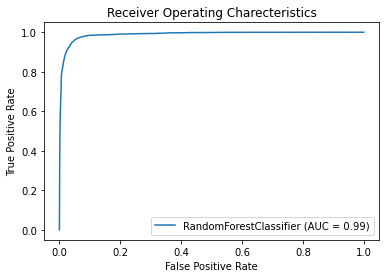

In [100]:
plot_roc_curve(mod2,x_test,y_test)
plt.title('Receiver Operating Charecteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Observation: Seems to be almost 99% with RandomForest model in AUC-ROC plot which is best percentage score.

## Saving the Model:

In [101]:
import joblib
joblib.dump(mod2,"Income.pkl")

['Income.pkl']

In [102]:
mod3=joblib.load("Income.pkl")

In [103]:
prediction=mod2.predict(x_test)

In [104]:
print(f1_score(y_test,prediction)*100)

94.1879890969841


In [105]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [106]:
prediction.to_csv('Income.csv') #Saving the predictions

In [107]:
prediction

,0
0,1
1,1
2,1
3,1
4,0
...,...
10872,1
10873,0
10874,1
10875,1


# Summary and Observation:
Hence we have Saved the model and Checked by loading whether its working fine. and ckecked with predicting.